In [1]:

"""from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import mylib as my"""

'from sklearn.naive_bayes import MultinomialNB\nfrom sklearn.datasets import fetch_20newsgroups\nfrom sklearn.linear_model import SGDClassifier\nfrom sklearn.svm import LinearSVC\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn import metrics\n\nimport mylib as my'

## Reading and Prepping Data

In [36]:
%matplotlib inline

import numpy as np
import pandas as pd

book_of_mormon = pd.read_csv('data/BookOfMormon.csv')
new_testament = pd.read_csv('data/NewTestament_KJV.csv')
old_testament = pd.read_csv('data/OldTestament_KJV.csv')

book_of_mormon['y'] = 'Book of Mormon'
new_testament['y'] = 'New Testament'
old_testament['y'] = 'Old Testament'

frames = [book_of_mormon, new_testament, old_testament.sample(frac = 0.25)]
data = pd.concat(frames)

In [37]:
data.sample(frac = 0.05)

,Book Name,Chapter Number,Verse Number,Word Count,Text,y
694,2 Nephi,3,10.0,16,"And Moses will I raise up, to deliver thy peop...",Book of Mormon
2934,John,1,31.0,21,And I knew him not: but that he should be made...,New Testament
5035,Romans,9,19.0,18,"Thou wilt say then unto me, Why doth he yet fi...",New Testament
5067,3 Nephi,4,14.0,41,"And it came to pass that Giddianhi, who had st...",Book of Mormon
3322,Alma,27,23.0,73,"And behold, we will set our armies between the...",Book of Mormon
...,...,...,...,...,...,...
3315,Alma,27,16.0,37,And it came to pass that as Ammon was going fo...,Book of Mormon
3243,John,8,3.0,22,And the scribes and Pharisees brought unto him...,New Testament
19125,Jeremiah,2,14.0,13,Is Israel a servant? is he a homeborn slave? w...,Old Testament
263,Genesis,10,28.0,6,"And Obal, and Abimael, and Sheba,",Old Testament


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['y'], test_size=0.2)

## Naive Bayes

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(X_train)

clf = MultinomialNB(alpha=0.5).fit(tfid_vect_results, y_train)

unknown = 'I will go and do the things that the Lord commands of me'
vect_pred = vectorizer.transform([unknown])  # vectorizer is expecting a list
print(clf.predict(vect_pred))

['Book of Mormon']


In [40]:
predictions = vectorizer.transform(X_test)
clf.predict(predictions)

array(['Book of Mormon', 'Old Testament', 'New Testament', ...,
       'Old Testament', 'Old Testament', 'Old Testament'], dtype='<U14')

Text(0.5, 1.0, 'Logistic regression learning curves - using epochs')

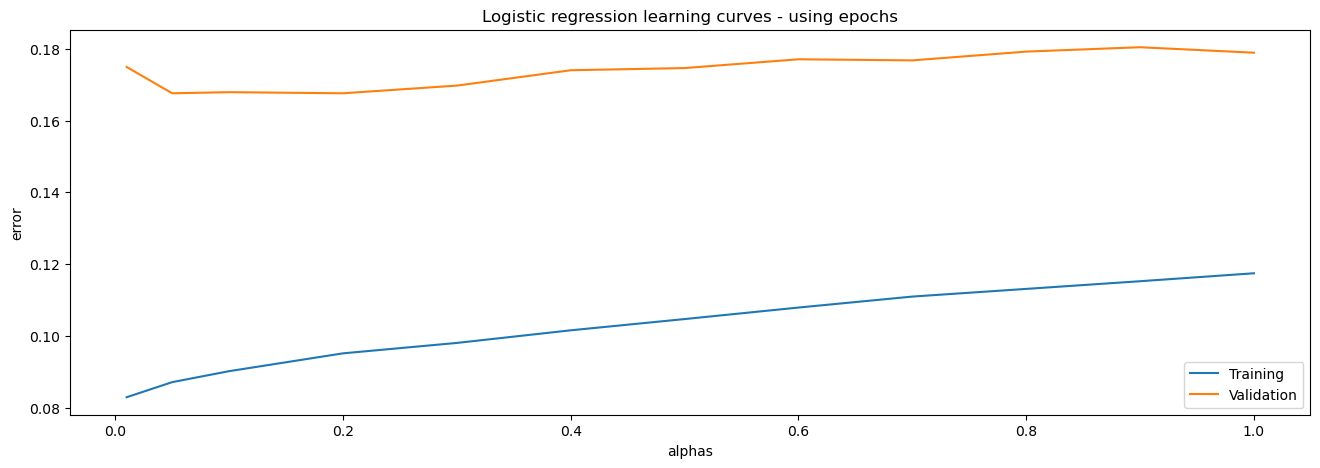

In [41]:
from sklearn.metrics import accuracy_score

X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.2)
tfid_vect_results_train = vectorizer.fit_transform(X_train2)
#tfid_vect_results_valid = vectorizer.fit_transform(X_valid)

alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_err = []
valid_err = []
for a in alphas:
    clf = MultinomialNB(alpha=a).fit(tfid_vect_results_train, y_train2)
    
    trainVectors = vectorizer.transform(X_train2)
    validVectors = vectorizer.transform(X_valid)
    
    train_err.append(1 - accuracy_score(y_train2, clf.predict(trainVectors)))
    valid_err.append(1 - accuracy_score(y_valid, clf.predict(validVectors)))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(alphas, train_err, label="Training")
ax.plot(alphas, valid_err, label="Validation")
ax.set_xlabel("alphas")
ax.set_ylabel("error")
ax.legend()
ax.set_title("Logistic regression learning curves - using epochs")

C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.8444064484611626

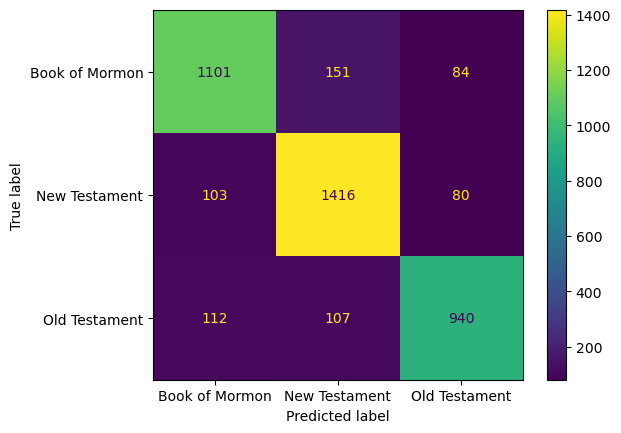

In [42]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(X_train)

clf = MultinomialNB(alpha=0.1).fit(tfid_vect_results, y_train)

predictions = vectorizer.transform(X_test)

plot_confusion_matrix(clf, predictions, y_test) 
accuracy_score(y_test, clf.predict(predictions))

C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9049218368343918

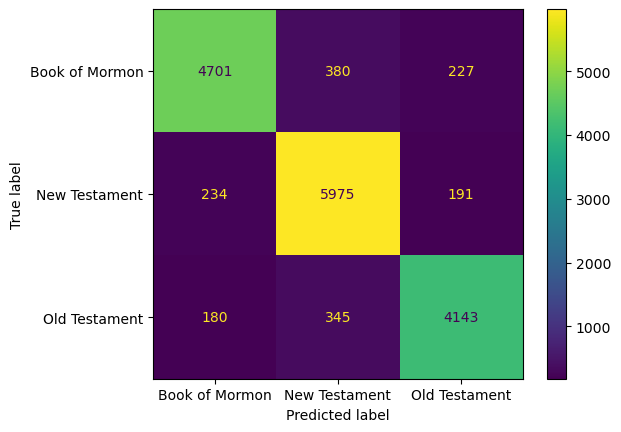

In [43]:
predictions = vectorizer.transform(X_train)
plot_confusion_matrix(clf, predictions, y_train) 
accuracy_score(y_train, clf.predict(predictions))

## Logistic Regression

The average correct for the Logistic Regression:
0.8544211040547142


C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


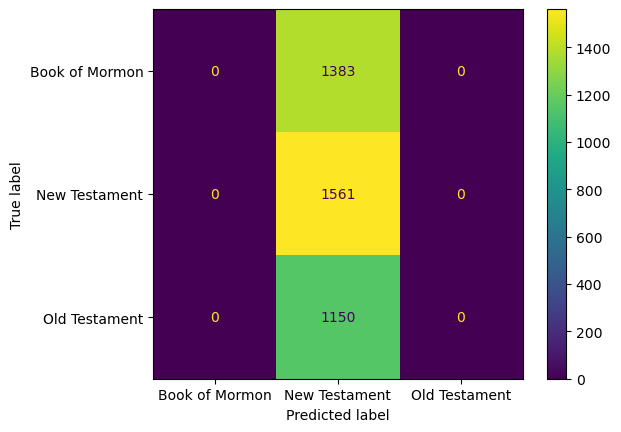

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('lr', LogisticRegression(random_state=0, solver="lbfgs", max_iter=1000,
multi_class="auto"))
])
text_clf.fit(X_train, y_train)  
predicted = text_clf.predict(X_test)
print("The average correct for the Logistic Regression:")
print(np.mean(predicted == y_test))

plot_confusion_matrix(text_clf, predicted, y_test) 

## PCA

In [10]:
"""from sklearn.decomposition import PCA

print(predictions.shape)
plt.scatter(predictions[0], predictions[0])
#pca = PCA(n_components=1)
#X_pca = pca.fit_transform(predictions)"""

'from sklearn.decomposition import PCA\n\nprint(predictions.shape)\nplt.scatter(predictions[0], predictions[0])\n#pca = PCA(n_components=1)\n#X_pca = pca.fit_transform(predictions)'

## TSNE Scatterplot

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=3)
X_tsne = tsne.fit_transform(predictions)

C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


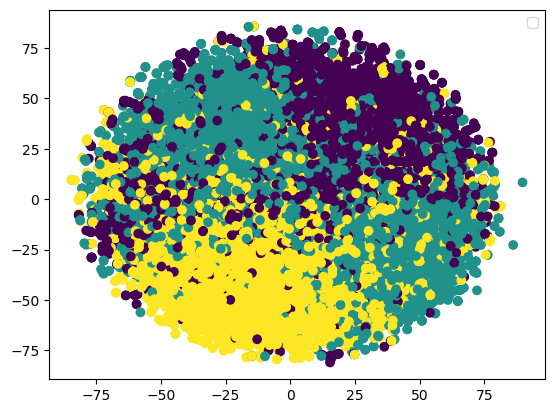

In [12]:
import matplotlib.pyplot as plt

new_train_y = y_train.map({'Old Testament': 0, 'New Testament': 1, 'Book of Mormon': 2})
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=new_train_y)
plt.legend()

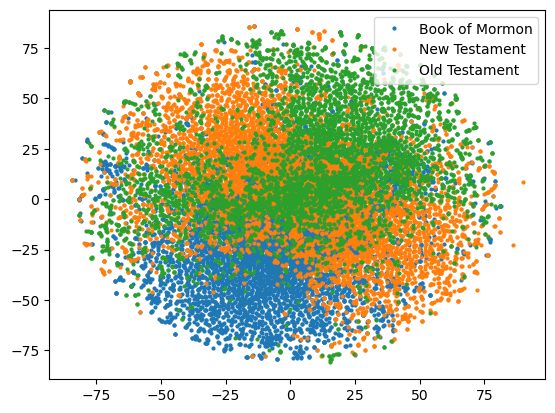

In [13]:
d = {'z1': X_tsne[:, 0], 'z2': X_tsne[:, 1], 'y': y_train}
df = pd.DataFrame(data=d)

groups = df.groupby('y')
for name, group in groups:
    plt.plot(group.z1, group.z2, marker='o', linestyle='', markersize=2, label=name)
    
plt.legend()

## Measuring Similarity with TF-IDF

In [14]:
tfidf = TfidfVectorizer().fit_transform(data)
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = tfidf * tfidf.T

In [15]:
print(pairwise_similarity)

  (0, 0)	1.0000000000000002
  (1, 2)	0.4020653121168304
  (1, 1)	1.0
  (2, 1)	0.4020653121168304
  (2, 2)	1.0
  (3, 3)	1.0000000000000002
  (4, 4)	1.0


## Adding more Data

In [16]:
castle_of_otranto = pd.read_fwf('data/castleofotranto.txt', header=None)
castle_of_otranto['y'] = 'Castle of Otranto'

frankenstein = pd.read_fwf('data/frankenstein.txt', header=None)
frankenstein['y'] = 'Frankenstein'

jane_eyre = pd.read_fwf('data/janeeyre.txt', header=None)
jane_eyre['y'] = 'Jane Eyre'

frames = [castle_of_otranto, frankenstein, jane_eyre.sample(frac = 0.33)]
bookData = pd.concat(frames)
bookData = bookData.rename(columns={0: "Text", "y": "y"})

In [17]:
frames = [data, bookData]
allData = pd.concat(frames)

In [18]:
allData

,Book Name,Chapter Number,Verse Number,Word Count,Text,y
0,1 Nephi,1.0,NaN,5.0,The First Book of Nephi,Book of Mormon
1,1 Nephi,1.0,NaN,4.0,His Reign and Ministry,Book of Mormon
2,1 Nephi,1.0,NaN,168.0,"An account of Lehi and his wife Sariah, and hi...",Book of Mormon
3,1 Nephi,1.0,1.0,68.0,"I, Nephi, having been born of goodly parents, ...",Book of Mormon
4,1 Nephi,1.0,2.0,25.0,"Yea, I make a record in the language of my fat...",Book of Mormon
...,...,...,...,...,...,...
11140,NaN,NaN,NaN,NaN,"of authority. I must be aided, and by that ha...",Jane Eyre
12556,NaN,NaN,NaN,NaN,"and, followed by his father's old pointer, Car...",Jane Eyre
13811,NaN,NaN,NaN,NaN,me almost dying at his threshold was my blood ...,Jane Eyre
10162,NaN,NaN,NaN,NaN,"""I shall be very glad to do so, sir.""",Jane Eyre


In [19]:
X_train, X_test, y_train, y_test = train_test_split(allData['Text'], allData['y'], test_size=0.2)

## Logistic Regression on New Data

The average correct for the Logistic Regression:
0.7994374120956399


C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


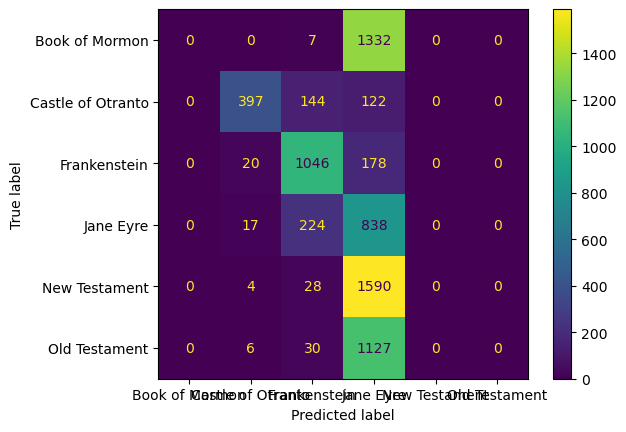

In [20]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('lr', LogisticRegression(random_state=0, max_iter=1000, solver="lbfgs", multi_class="auto"))
])
text_clf.fit(X_train, y_train)  
predicted = text_clf.predict(X_test)
print("The average correct for the Logistic Regression:")
print(np.mean(predicted == y_test))

plot_confusion_matrix(text_clf, predicted, y_test) 

In [21]:
vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(X_train)

clf = MultinomialNB().fit(tfid_vect_results, y_train)

unknown = 'I will go and do the things that the Lord commands of me'
vect_pred = vectorizer.transform([unknown])  # vectorizer is expecting a list
clf.predict(vect_pred)

array(['Book of Mormon'], dtype='<U17')

C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7489451476793249

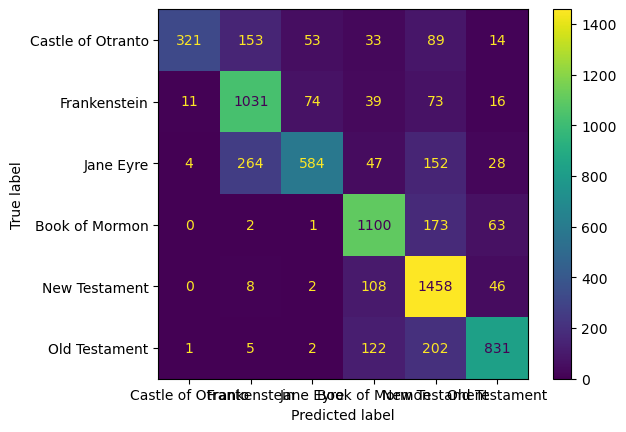

In [22]:
predictions = vectorizer.transform(X_test)
plot_confusion_matrix(clf, predictions, y_test, labels=['Castle of Otranto', 'Frankenstein', 'Jane Eyre', 
                                                       'Book of Mormon', 'New Testament', 'Old Testament']) 
accuracy_score(y_test, clf.predict(predictions))

In [23]:
tsne = TSNE(n_components=2, perplexity=3)
X_tsne = tsne.fit_transform(predictions)

C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


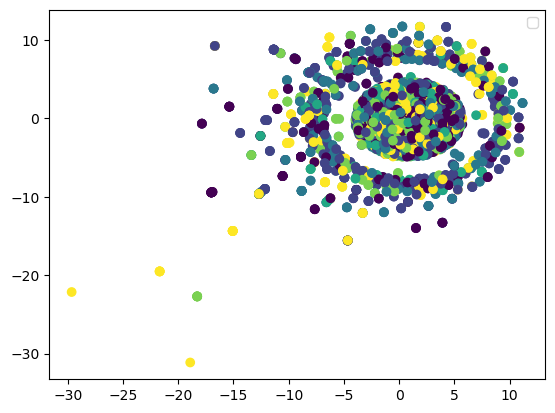

In [24]:
new_test_y = y_test.map({'Old Testament': 0, 'New Testament': 1, 'Book of Mormon': 2, 
                           'Castle of Otranto': 3, 'Frankenstein': 4, 'Jane Eyre': 5})
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=new_test_y)
plt.legend()

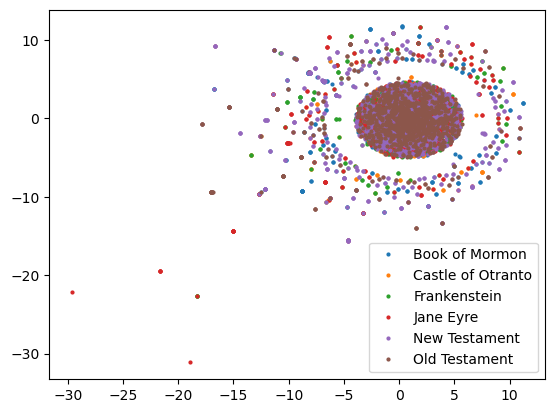

In [25]:
d = {'z1': X_tsne[:, 0], 'z2': X_tsne[:, 1], 'y': y_test}
df = pd.DataFrame(data=d)

groups = df.groupby('y')
for name, group in groups:
    plt.plot(group.z1, group.z2, marker='o', linestyle='', markersize=2, label=name)
    
plt.legend()

In [26]:
tfidf = TfidfVectorizer().fit_transform(allData)
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = tfidf * tfidf.T
print(pairwise_similarity)

  (0, 0)	1.0000000000000002
  (1, 2)	0.4020653121168304
  (1, 1)	1.0
  (2, 1)	0.4020653121168304
  (2, 2)	1.0
  (3, 3)	1.0000000000000002
  (4, 4)	1.0
